In [3]:
%matplotlib inline
import GEOparse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)


geo = "GSE137140"

In [4]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Asakura2020", silent=True)

In [5]:
len(data.gsms)

3924

In [6]:
list(data.gsms.values())[0].metadata

{'title': ['BC0921'],
 'geo_accession': ['GSM4067570'],
 'status': ['Public on Mar 30 2020'],
 'submission_date': ['Sep 09 2019'],
 'last_update_date': ['Mar 30 2020'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['Serum'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['disease state: Non-cancer control',
  'Sex: Female',
  'age: 51',
  'tissue: serum'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was extracted each from 300uL serum samples using 3D-GeneÂ® RNA extraction reagent from liquid sample kit (Toray Industries, Inc.).'],
 'label_ch1': ['Cy5'],
 'label_protocol_ch1': ["miRNA was labeled using 3D-GeneÂ® miRNA Labeling kit in accordance with the manufacturer's instructions."],
 'hyb_protocol': ['Hybridized for 16 h at 32 ÂºC with rotary shaker (250 rpm). Hybridization buffer and washing protocol was attached in the 3D-GeneÂ® miRNA oligo chip kit.'],
 'scan_protocol': ['3D-GeneÂ® Scanner (Toray Indus

In [7]:
table = pd.concat((val.table.iloc[:,1:] for val in data.gsms.values() if "post" not in val.metadata["characteristics_ch1"][0]), axis=1).transpose()

In [186]:
table

,0,1,2,3,4,5,6,7,8,9,...,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
VALUE,5.086708,-0.152745,5.699617,4.810065,7.077510,4.267692,5.513438,5.385192,-0.152745,4.934934,...,-0.152745,-0.152745,6.582185,-0.152745,-0.152745,4.938112,-0.152745,2.654567,4.112574,2.602682
VALUE,3.831208,-1.100220,1.357639,0.798168,5.545789,-1.240936,3.253886,-1.240936,-1.240936,7.023287,...,-1.240936,4.742660,6.539544,-1.240936,-1.240936,5.533134,-1.240936,5.276312,5.290079,-1.240936
VALUE,4.303555,3.255123,3.304892,2.073625,5.526403,4.088665,4.209212,3.790642,3.506570,4.020617,...,0.595680,4.290597,6.368346,-1.531527,2.461213,5.490590,-1.531527,5.206588,4.695193,2.353867
VALUE,6.330142,6.489444,4.727589,4.406777,6.778755,4.511448,5.884671,5.470259,0.530399,5.091586,...,0.530399,4.882286,7.445885,4.116002,5.000109,6.733061,4.511753,6.511228,6.433161,5.693330
VALUE,5.911772,2.738662,4.171431,0.853141,6.736975,5.749693,5.243776,0.853141,6.072689,6.497622,...,0.853141,0.853141,6.224340,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALUE,3.867679,3.501322,2.837191,0.665455,4.803604,1.130736,6.193152,0.416550,-0.498561,1.665464,...,-5.540565,4.763400,7.220702,-5.540565,3.089055,4.941072,-0.742389,4.942069,4.134535,-5.540565
VALUE,5.311947,4.073188,4.101201,2.118686,5.698477,2.344266,4.712554,0.785063,-4.417322,2.849492,...,-4.417322,5.446265,7.163131,-4.417322,2.154039,4.884964,-4.417322,4.718529,3.350626,-4.417322
VALUE,2.229432,2.674183,3.867016,3.424473,5.689167,3.830466,5.090698,1.019828,0.885724,6.267623,...,-4.324501,5.002374,7.283329,-4.324501,2.489638,5.280215,0.143643,4.764032,3.781309,-1.050319
VALUE,2.249489,-0.639963,0.423182,1.028599,5.844544,0.472641,5.284079,-0.795367,-4.017530,5.966505,...,-4.017530,4.996310,7.052476,-4.017530,1.278360,4.922518,-0.396838,4.909489,3.475894,-4.017530


In [187]:
np.mean(table)

0       1.310076
1       0.988022
2       2.638220
3       1.103019
4       6.023407
          ...   
2560    5.777744
2561    0.294645
2562    5.541667
2563    4.280672
2564    0.765179
Length: 2565, dtype: float64

In [188]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [189]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

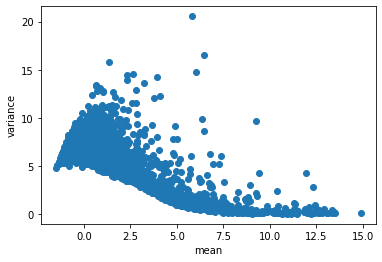

In [190]:
mean_variance_plot(table)

[]

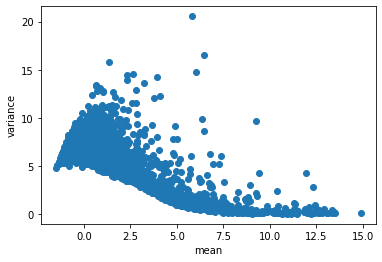

In [191]:
means, variances = get_means_and_variances(table)
plt.scatter(means, variances)
plt.xlabel("mean")
plt.ylabel("variance")
plt.plot()

### Loess regression

In [192]:
lowess = LowessRegression(sigma=1, span=0.5)

In [193]:
means, variances = get_means_and_variances(table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.5)

In [194]:
x_axis = np.linspace(-2, 14, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

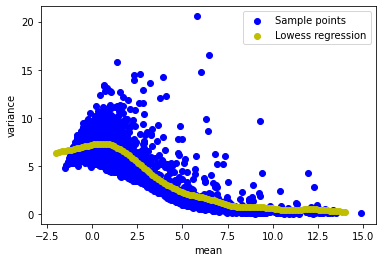

In [195]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

In [199]:
loess_out = pd.DataFrame(np.array([means, variances]).transpose(), columns=["means", "variances"])
loess_out["type"] = "Sample points"
loess_out2 = pd.DataFrame(np.array([x_axis, y_axis]).transpose(), columns=["means", "variances"])
loess_out2["type"] = "Loess regression"
loess_out = pd.concat([loess_out, loess_out2])
loess_out.to_csv("../Outdata/Loess/Before.csv", index=False)

### Lowess normalization

In [200]:
adj_var = lowess.predict(means.to_numpy().reshape(-1, 1))

In [201]:
table /= np.sqrt(adj_var)

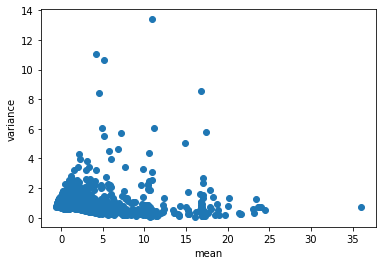

In [202]:
mean_variance_plot(table)

In [204]:
means, variances = get_means_and_variances(table)
loess_out = pd.DataFrame(np.array([means, variances]).transpose(), columns=["means", "variances"])
loess_out.to_csv("../Outdata/Loess/After.csv", index=False)

### Trying log-transformation

In [143]:
log_table = table#np.log2(table)

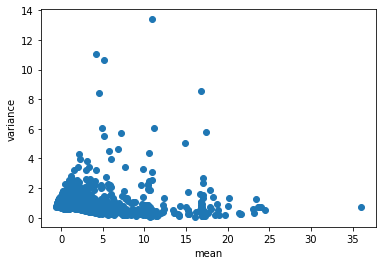

In [144]:
mean_variance_plot(log_table)

In [145]:
norm_log_table = log_table - np.mean(log_table)

In [146]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

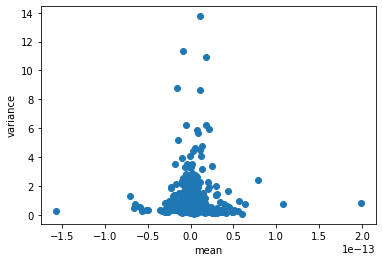

In [147]:
mean_variance_plot(norm_log_table)

### ANOVA

In [148]:
norm_log_table

,0,1,2,3,4,5,6,7,8,9,...,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
VALUE,1.449134,-0.430954,1.365652,1.406849,0.805262,1.123401,0.246799,1.433009,-0.580497,-0.841536,...,0.233796,-4.456615,-0.584493,0.296617,-0.801862,-0.622944,-0.167643,-2.082070,-0.099859,0.689845
VALUE,0.967386,-0.788887,-0.571251,-0.115693,-0.364867,-0.995412,-1.300345,-1.212952,-0.999273,0.756080,...,-0.186637,-0.805396,-0.624814,-0.125964,-1.238624,-0.181482,-0.575403,-0.191364,0.599645,-0.753146
VALUE,1.148630,0.856456,0.297394,0.368352,-0.379677,1.054541,-0.646222,0.796270,0.827746,-1.541000,...,0.522958,-1.142565,-0.786695,-0.238811,0.247290,-0.213046,-0.684292,-0.241647,0.246249,0.596434
VALUE,1.926253,2.078304,0.932042,1.253799,0.577034,1.217159,0.500987,1.466978,-0.317597,-0.721695,...,0.497736,-0.701256,0.232201,1.954314,1.266315,0.708774,1.580208,0.699211,1.278700,1.850153
VALUE,1.765720,0.661349,0.683947,-0.094830,0.545116,1.693431,0.062157,-0.376740,1.815285,0.353940,...,0.622431,-3.706378,-0.922863,0.687236,-0.398134,-3.653687,0.209276,-3.381191,-2.036147,0.033023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALUE,0.981380,0.949464,0.088759,-0.166058,-0.931845,-0.083183,0.712208,-0.551081,-0.713580,-3.342721,...,-1.847842,-0.789927,0.019272,-1.795654,0.499284,-0.620747,-0.388591,-0.432408,-0.086813,-2.367336
VALUE,1.535561,1.165501,0.652618,0.385453,-0.248224,0.383584,-0.301577,-0.403925,-2.221667,-2.436925,...,-1.413866,-0.280615,-0.035165,-1.359461,0.124001,-0.662376,-1.765638,-0.593617,-0.552500,-1.945642
VALUE,0.352767,0.636991,0.548151,0.881008,-0.255336,0.955229,-0.042657,-0.310178,-0.180855,0.177988,...,-1.378003,-0.611689,0.078492,-1.323416,0.258699,-0.369129,-0.056583,-0.560802,-0.296650,-0.681584
VALUE,0.360463,-0.615013,-0.988101,-0.028243,-0.136638,-0.336310,0.089753,-1.035026,-2.067812,-0.052372,...,-1.259402,-0.616212,-0.139797,-1.204209,-0.227466,-0.634513,-0.259108,-0.455903,-0.478083,-1.795550


In [149]:
controls = np.array(["control" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [150]:
X = np.array(controls).reshape(-1, 1)

In [151]:
linreg = LinearRegression()
linreg.fit(X, norm_log_table)

LinearRegression()

In [152]:
fitted = linreg.predict(X)
explained_variance_score(norm_log_table, fitted, multioutput="variance_weighted")

0.2303410594756188

# PCA

In [153]:
pca = decomposition.PCA(n_components=2)

In [154]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [155]:
components = pca.transform(norm_log_table)

In [156]:
components

array([[ 11.35816486,   9.89854189],
       [  0.81441051,  13.00943486],
       [ 12.71512654,   1.49822852],
       ...,
       [-37.79459714, -10.02768343],
       [-43.93684193,  14.66698513],
       [-11.08215447,   7.77599722]])

In [157]:
sick = 1 - controls

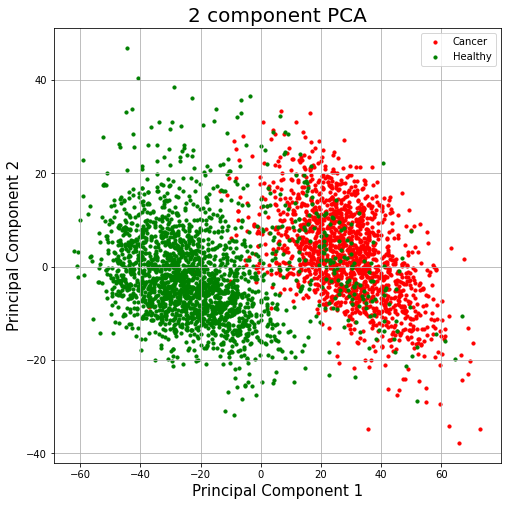

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

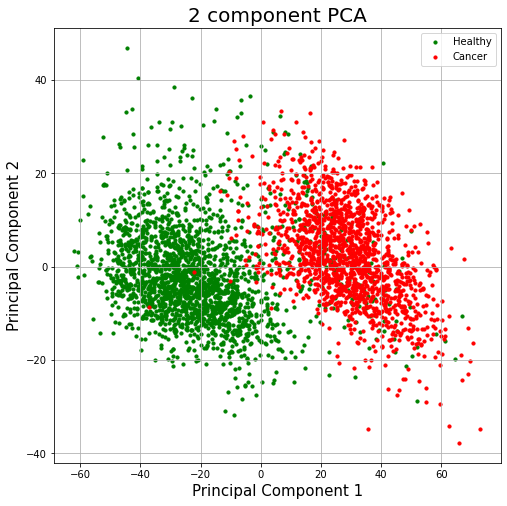

In [159]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [160]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][1] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])
age = np.array([float(k.metadata["characteristics_ch1"][2].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [161]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [162]:
covars = covars.fillna(covars.mean())

In [163]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [164]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [165]:
pca = decomposition.PCA(n_components=2)

In [166]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [167]:
components = pca.transform(adj_norm_log_table)

In [168]:
components

array([[ 18.42632541,  12.33398427],
       [ 12.71023655,  14.50689918],
       [  2.24682444,   0.92002411],
       ...,
       [-13.74111262,  -8.25861247],
       [-25.33281335,  15.32123843],
       [ -7.31585157,   8.27196537]])

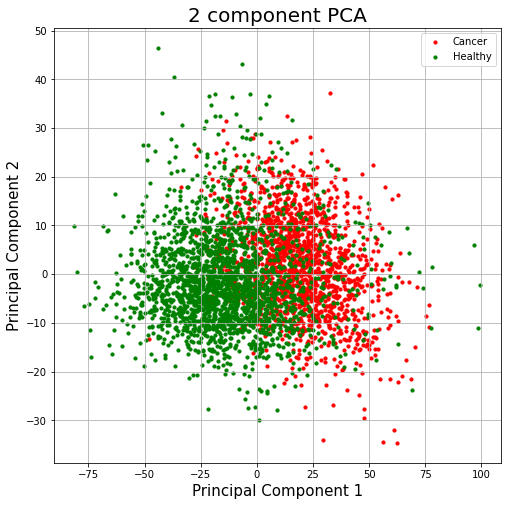

In [169]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### XGBoost

In [170]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [171]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[18:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


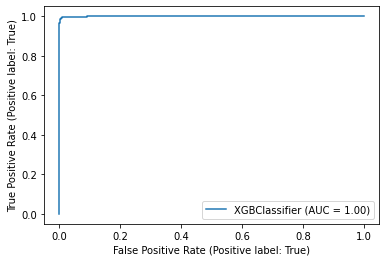

In [172]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [173]:
mirnas = list(data.gsms.values())[0].table.iloc[:, 0]

In [174]:
from Scripts import converters

In [175]:
sequences = converters.mirbase_to_seq(mirnas)

In [176]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = sick
adj_norm_log_table.head()

,CACUAGAUUGUGAGCUCCUGGA,AGGGCUUAGCUGCUUGUGAGCA,CAAAGCGCUCCCCUUUAGAGGU,AAAGUGCUUCCUUUUAGAGGG,UUUCAAGCCAGGGGGCGUUUUUC,AAGUGCUGUCAUAGCUGAGGUC,AGUGGGGAACCCUUCCAUGAGG,CAACCUGGAGGACUCCAUGCUG,AACUGUUUGCAGAGGAAACUGA,AAACCGUUACCAUUACUGAGUU,...,UCGCGCCCCGGCUCCCGUUC,UCGGGGAGUCUGGGGUCCGGAAU,AUCUGUCUCGAUUGUUUCCAG,UGGGGUAAGGAUAGGAGGGUCA,CCGCCUUCUCUCCUCCCCCAG,CAGAGGGAAUACAGAGGGCAAU,CCCAUGCCUCCUGCCGCGGUC,UAGGUGGCAGAGGAGGGACUUCA,GUGAGACUUCUCUCCCUUCAG,cancer
VALUE,1.637575,-0.201590,1.456670,1.569437,0.905001,1.283735,0.317420,1.649254,-0.391952,0.045800,...,-4.348220,-0.675701,0.448485,-0.617313,-0.496793,0.056636,-1.941366,0.150427,0.814511,0
VALUE,1.213913,-0.477231,-0.455590,0.121758,-0.181439,-0.765283,-1.179047,-0.874448,-0.702896,2.070798,...,-0.610348,-0.783907,0.168430,-0.972106,0.032420,-0.202035,0.053739,0.979082,-0.489113,0
VALUE,1.151196,0.822486,0.309553,0.291377,-0.547740,0.991530,-0.737765,0.621288,0.671226,-2.021284,...,-1.311461,-0.660665,-0.543022,0.169536,-0.367701,-0.937097,-0.435022,0.083252,0.275122,0
VALUE,2.056608,2.225376,0.998417,1.341523,0.593085,1.307697,0.520932,1.560965,-0.236885,-0.261740,...,-0.679515,0.208880,1.963658,1.368894,0.747173,1.655398,0.735516,1.399835,1.835450,0
VALUE,1.930927,0.857797,0.765107,0.037812,0.611381,1.825847,0.112508,-0.209398,1.960697,1.070324,...,-3.632645,-0.986916,0.782095,-0.246373,-3.562636,0.373920,-3.282247,-1.837521,0.101942,0


In [178]:
#norm_log_table.to_csv("../TransformedData/Asakura2020.csv", index=False)
adj_norm_log_table.to_csv("../TransformedData/Asakura2020.csv", index=False)